# CSI 5140 — Homework 1

## Samantha Bracellari

### Question 1

You will build a linear regression model as per the following details: 

- The training data consists of 100 pairs of *x* and *y* values, representing noisy measurements made on a sine function in the interval of 0-2pi. The measurements are made at equally spaced points and are corrupted with noise coming from a normal distribution with zero mean and unit variance. Create a plot of the data.
- The model equation to be used is *yi = b0 + b1\*xi + b2\*xi^2 + b3\*xi^3* 
- The model will be constructed using gradient search and not the sklearn regressor. 
- After the model has been trained, you will plot the predicted *y* values against *x* values.
- Play with the choice of learning rate as well as changing the degree of polynomial in the model equation to 2 and 4. Plot and discuss your results.


#### Part 1: Data Generation

Generate and plot a noisy sine wave. The noise should come from a normal distribution.

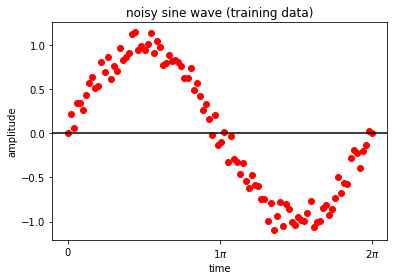

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

noise = np.random.normal(0, 0.1, 100) # normal distribution
time = np.linspace(0, 2*np.pi, num=100) # 100 equally spaced points in [0, 2pi]
amp = np.sin(time) + noise # generate sine wave and add noise

# plot sine wave (the training data)
plt.scatter(time, amp, color='red')
plt.title('noisy sine wave (training data)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.axhline(y=0, color='k')
ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(
    lambda val, pos: '{:.0f}$\pi$'.format(val / np.pi) if val != 0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.show()

#### Part 2: Data Preparation

For specified input data *x* and degree *d*, return a set of data with *d* columns of the format *x^i* where *i* is in the interval [0, *d*] (e.g. for degree 2, there would be three columns: 1 , *x* , *x^2*)

In [6]:
import numpy as np

def prep_data(data, degree):
    x = []
    for d in range(degree+1):
        x.append(np.power(data, d))
    return np.array(x).T

#### Part 3: Gradient Descent

Implement a gradient search algorithm to train the model. 

In [7]:
import numpy as np

def gd(x, y, beta, alpha, epochs=50000):
    for _ in range(0, epochs):
        loss = y - np.matmul(beta, x.T) # loss
        g = -np.matmul(loss, x) # new gradient
        beta = beta - alpha*g # update beta
    return beta

#### Part 4: Predictions

Use the beta values obtained from the gradient search to calculate the predictions. This function is configured to accept an array of learning rates and accounts for three different degrees: 2, 3, and 4.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def predict(x, y, rates, degree):
    predictions = []
    for alpha in rates:
        b = np.ones(degree+1)
        beta = gd(x, y, b, alpha) # get beta values and cost

        if degree == 2:
            yhat = np.array(
                beta[0] + beta[1]*x[:,1] + beta[2]*x[:,2]
            )
        elif degree == 3:
            yhat = np.array(
                beta[0] + beta[1]*x[:,1] + beta[2]*x[:,2] + beta[3]*x[:,3]
            )
        elif degree == 4:
            yhat = np.array(
                beta[0] + beta[1]*x[:,1] + beta[2]*x[:,2] + beta[3]*x[:,3] + beta[4]*x[:,4]
            )
        
        predictions.append(yhat)
        
    return np.array(predictions)

#### Part 5: Outcomes

For each degree (2-4), plot the predicted *y* values against the original *x* values using 3 different learning rates. Learning rates are not the same for each degree.

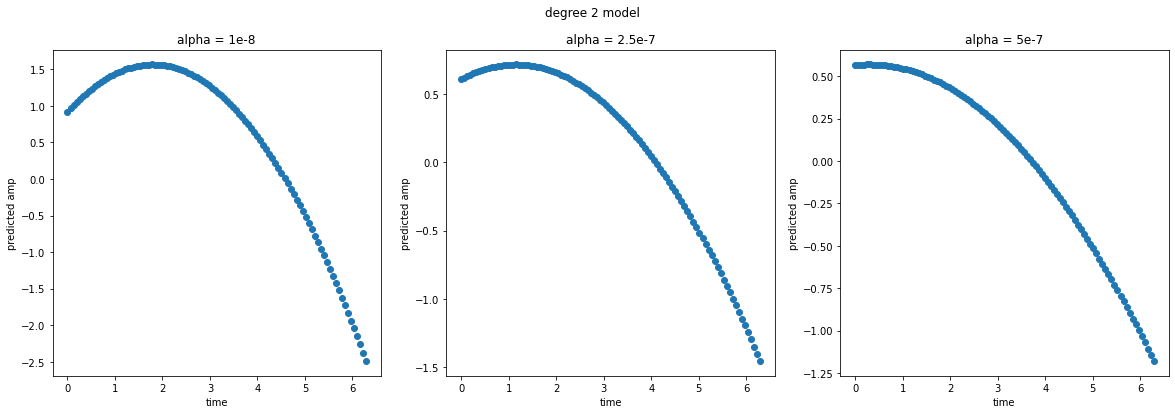

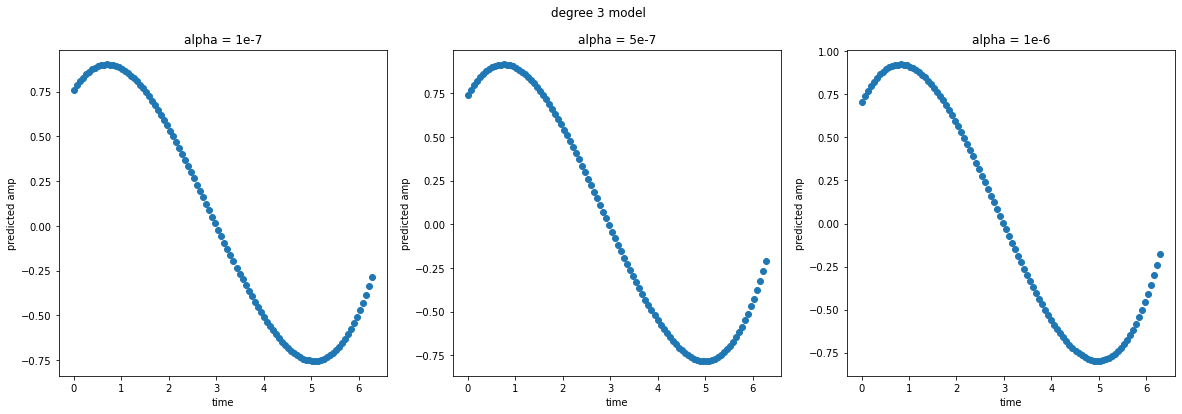

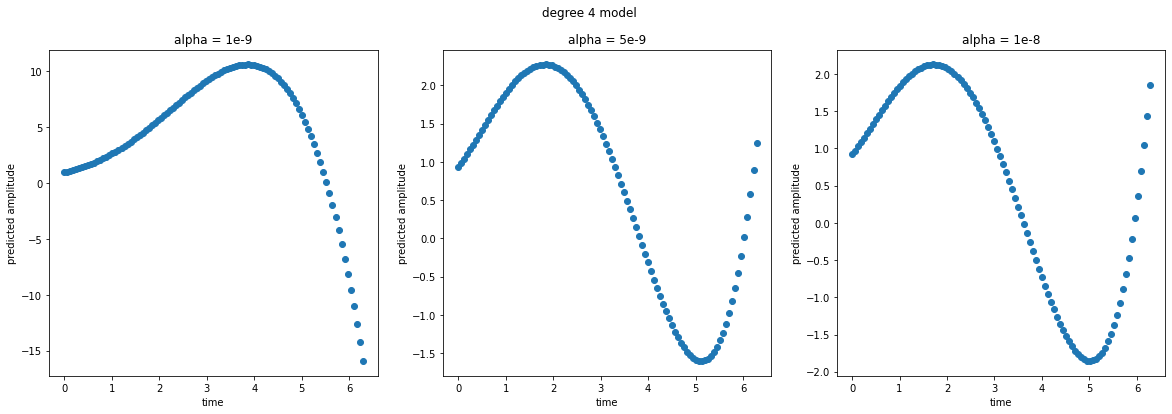

In [9]:
import matplotlib.pyplot as plt

# degree 2 model
rates = [0.00000001, 0.00000025, 0.0000005] # learning rates
x = prep_data(time, 2)
predictions = predict(x, amp, rates, 2)

fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('degree 2 model')
axs[0].scatter(time, predictions[0])
axs[0].set_title('alpha = 1e-8')

axs[1].scatter(time, predictions[1])
axs[1].set_title('alpha = 2.5e-7')

axs[2].scatter(time, predictions[2])
axs[2].set_title('alpha = 5e-7')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='predicted amp')

# degree 3 model
rates = [0.0000001, 0.0000005, 0.000001] # learning rates
x = prep_data(time, 3)
predictions = predict(x, amp, rates, 3)

fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('degree 3 model')
axs[0].scatter(time, predictions[0])
axs[0].set_title('alpha = 1e-7')

axs[1].scatter(time, predictions[1])
axs[1].set_title('alpha = 5e-7')

axs[2].scatter(time, predictions[2])
axs[2].set_title('alpha = 1e-6')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='predicted amp')

# degree 4 model
rates = [0.000000001, 0.000000005, 0.00000001] # learning rates
x = prep_data(time, 4)
predictions = predict(x, amp, rates, 4)

fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('degree 4 model')
axs[0].scatter(time, predictions[0])
axs[0].set_title('alpha = 1e-9')

axs[1].scatter(time, predictions[1])
axs[1].set_title('alpha = 5e-9')

axs[2].scatter(time, predictions[2])
axs[2].set_title('alpha = 1e-8')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='predicted amplitude')

#### Part 6: Discussion

It is obvious to see that the original model of degree 3 best fits the data. Degree 4 does an okay job as well, but is more particular about the learning rate and number of iterations used in the gradient descent, whereas the model of degree 3 is a bit less specific about what it needs to work decently. The degree 2 model does not do a very good job of generalizing to the data.

-----

### Question 2

Build a model to predict corn yield with two independent variables: fertilizers and insecticides. The data for this task is listed below. Again, you will build the model using the gradient search and not using any 3rd party library.

| Corn | Fertilizer | Insecticides |
|:----:|:----------:|:------------:|
| 40   | 6          | 4            |
| 44   | 10         | 4            |
| 46   | 12         | 5            |
| 48   | 14         | 7            |
| 52   | 16         | 9            |
| 58   | 18         | 12           |
| 60   | 22         | 14           |
| 68   | 24         | 20           |
| 74   | 26         | 21           |
| 80   | 32         | 24           |

#### Part 1: Data Preparation & Initial Setup

Load data into a DataFrame. Define our learning rate and initial beta values.

In [10]:
import numpy as np
import pandas as pd

# load data into np array
corn = np.array([
    [40, 6, 4],
    [44, 10, 4],
    [46, 12, 5],
    [46, 12, 5],
    [48, 14, 7],
    [52, 16, 9],
    [58, 18, 12],
    [60, 22, 14],
    [68, 24, 20],
    [74, 26, 21],
    [80, 32, 24]
])

# load data into dataframe
data = pd.DataFrame(corn, columns=['Corn', 'Fertilizer', 'Insecticides'])

x = np.array([[1]*11, data['Fertilizer'], data['Insecticides']]).T
y = np.array(data['Corn']) # target
alpha = 0.0000025
beta = np.ones(3)

#### Part 2: Gradient Descent

Implement a gradient search algorithm to train the model.

In [11]:
import numpy as np

def gd(x, y, beta, alpha, m=11, epochs=1000):
    for _ in range(0, epochs):
        loss = y - np.matmul(beta, x.T) # loss
        g = -np.matmul(loss, x) # new gradient
        beta = beta - alpha*g # update beta
    return beta

#### Part 3: Predictions & Outcomes 

Using the beta values obtained from the gradient search, calculate the predicted corn yield. Plot against the actual yield to visualize the model accuracy.

beta values: [1.18890668 2.11309856 1.11359973]
predicted values:
 [18.32189695 26.77429118 32.11408803 32.11408803 38.56748461 45.02088119
 52.5878775  63.26747119 74.17526669 79.51506354 95.53445408]


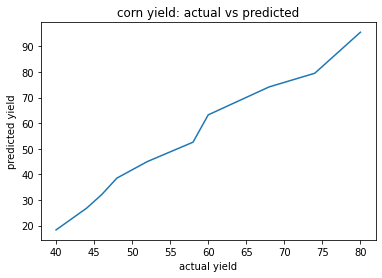

In [12]:
import numpy as np
import matplotlib.pyplot as plt

beta = gd(x, y, beta, alpha)
print('beta values:', beta)
yhat = np.array(beta[0] + beta[1]*data['Fertilizer'] + beta[2]*data['Insecticides'])
print('predicted values:\n', yhat)

plt.plot(y, yhat)
plt.title('corn yield: actual vs predicted')
plt.xlabel('actual yield')
plt.ylabel('predicted yield')
plt.show()

-----

### Question 3 

Implement in Python the pseudo-inverse approach and determine the prediction model for the data in exercise 2 above. How different are the model parameters obtained in exercise 2 than with exercise 3?

#### Part 1: Data Preparation & Initial Setup

Load the data into a DataFrame.

In [13]:
import numpy as np
import pandas as pd

# load data into np array
corn = np.array([
    [40, 6, 4],
    [44, 10, 4],
    [46, 12, 5],
    [46, 12, 5],
    [48, 14, 7],
    [52, 16, 9],
    [58, 18, 12],
    [60, 22, 14],
    [68, 24, 20],
    [74, 26, 21],
    [80, 32, 24]
])

# load data into dataframe
data = pd.DataFrame(corn, columns=['Corn', 'Fertilizer', 'Insecticides'])

#### Part 2: Pseudo-Inverse Approach

Use the pseudo-inverse approach to calculate the predicted corn yield. Plot the predicted yield against the actual yield to visualize the results.

beta values: [32.00236099  0.67198567  1.07962224]
predicted values:
 [40.35276398 43.04070667 45.46430025 45.46430025 48.96751608 52.47073191
 57.05356997 61.90075714 69.72246194 72.14605552 79.41683628]


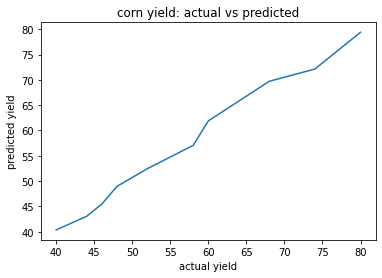

In [14]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# initial data
x = np.array([[1]*11, data['Fertilizer'], data['Insecticides']]).T
y = np.array(data['Corn']) # target

xt = x.T # x^t
xt_x = np.matmul(xt, x) # x^t * x
xt_xi = inv(xt_x) # invert the matrix
xstar = np.matmul(xt_xi, xt) # define x^*
beta = np.matmul(xstar, y) 
print('beta values:', beta)

# predicted values 
yhat = np.array(beta[0] + beta[1]*data['Fertilizer'] + beta[2]*data['Insecticides'])
print('predicted values:\n', yhat)

plt.plot(y, yhat)
plt.title('corn yield: actual vs predicted')
plt.xlabel('actual yield')
plt.ylabel('predicted yield')
plt.show()

#### Part 3: R^2 Score

Calculate the R^2 score to see how strongly the predicted and actual yield are correlated.

In [15]:
import numpy as np
from sklearn.metrics import r2_score

# calculate the r-squared coefficient
r2 = r2_score(np.array(data['Corn']), yhat)
print('R^2 value:', r2)

R^2 value: 0.9919558582870186


#### Part 4: Discussion & Comparison

As you can see from the visualization of both problem 2 and 3, the results are extremely close, despite the differences in the beta values obtained from gradient descent, as well as the predicted corn yield.

-----

### Question 4

This exercise is to perform digit recognition using logistic regression. You will use the sklearn library for this. [This](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a) link provides step-by-step directions for this task.

#### Part 1: Load sklearn Digits

Check out the shape of the data and the target.

In [747]:
from sklearn.datasets import load_digits

digits = load_digits()
print('shape of image data', digits.data.shape)
print('shape of label data', digits.target.shape)

shape of image data (1797, 64)
shape of label data (1797,)


#### Part 2: Plot Initial Training Images

Show each digit 0-9.

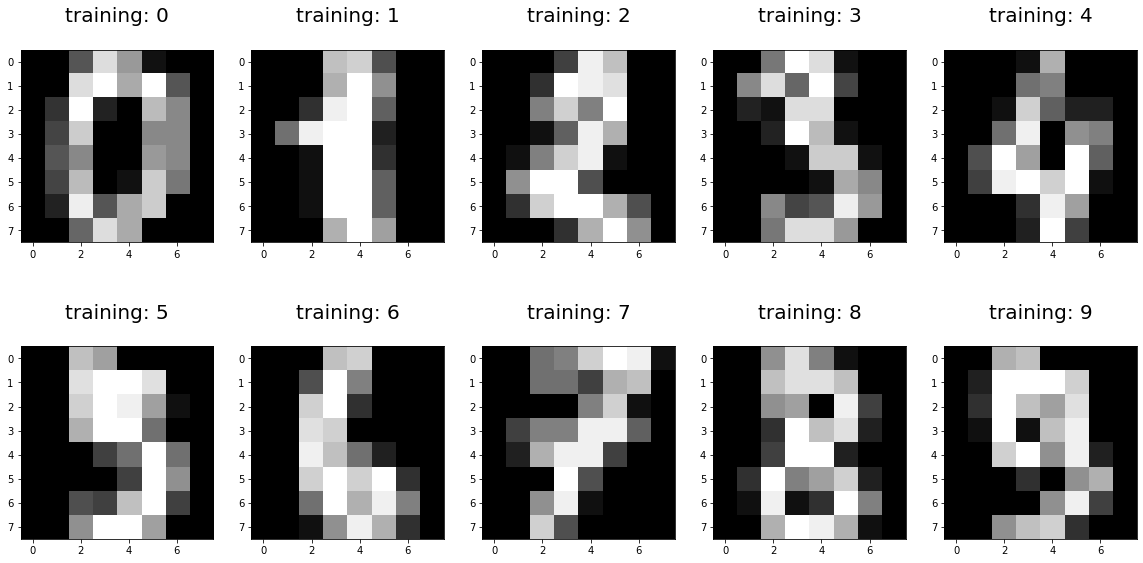

In [748]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('training: %i\n' % label, fontsize=20)

#### Part 3: Split Data for Training & Testing

25% of the data will be allocated to the test set.

In [749]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0
)

#### Part 4: Logistic Regression Modeling

Use the sklearn library to perform logistic regression and obtain the predictions and accuracy score.

In [750]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print('predictions:\n', predictions)

accuracy = lr.score(x_test, y_test)
print('accuracy: {:.0%}'.format(accuracy))

predictions:
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 9 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 8 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 1 1 5 5 9 1 3 7 0 0 3 0 4 5 8 9 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]
accuracy: 95%


#### Part 5: Confusion Matrix

Generate a confusion matrix of the results to help visualize accuracy.

Text(0.5, 1.0, 'accuracy score: 95%')

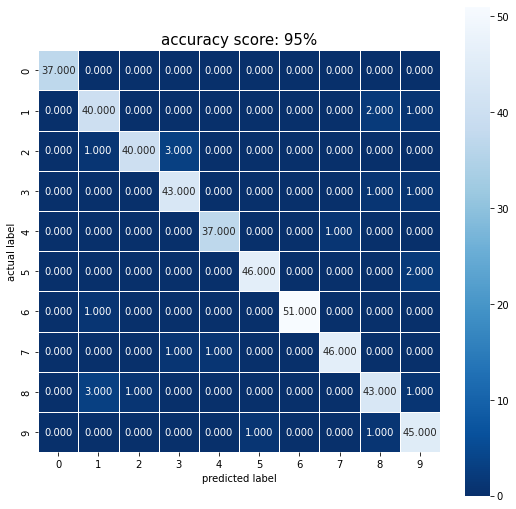

In [751]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 

title = 'accuracy score: {:.0%}'.format(accuracy)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(
    cm, annot=True, fmt='0.3f', linewidths=0.5, square=True, cmap='Blues_r'
)
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(title, size=15)

#### Part 6: Load MNIST Digits

Load the digit data from MNIST. Check out the shape of the data and the target.

In [752]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print('shape of data', mnist.data.shape)
print('shape of label', mnist.target.shape)

shape of data (70000, 784)
shape of label (70000,)


#### Part 7: Split Data for Training & Testing

1/7th of the data will be allocated to the test set.

In [753]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0
)

# convert to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)
train_lbl = np.array(train_lbl)
test_lbl = np.array(test_lbl)

#### Part 8: Display Training Digits

Show some of the digits used in the training set.

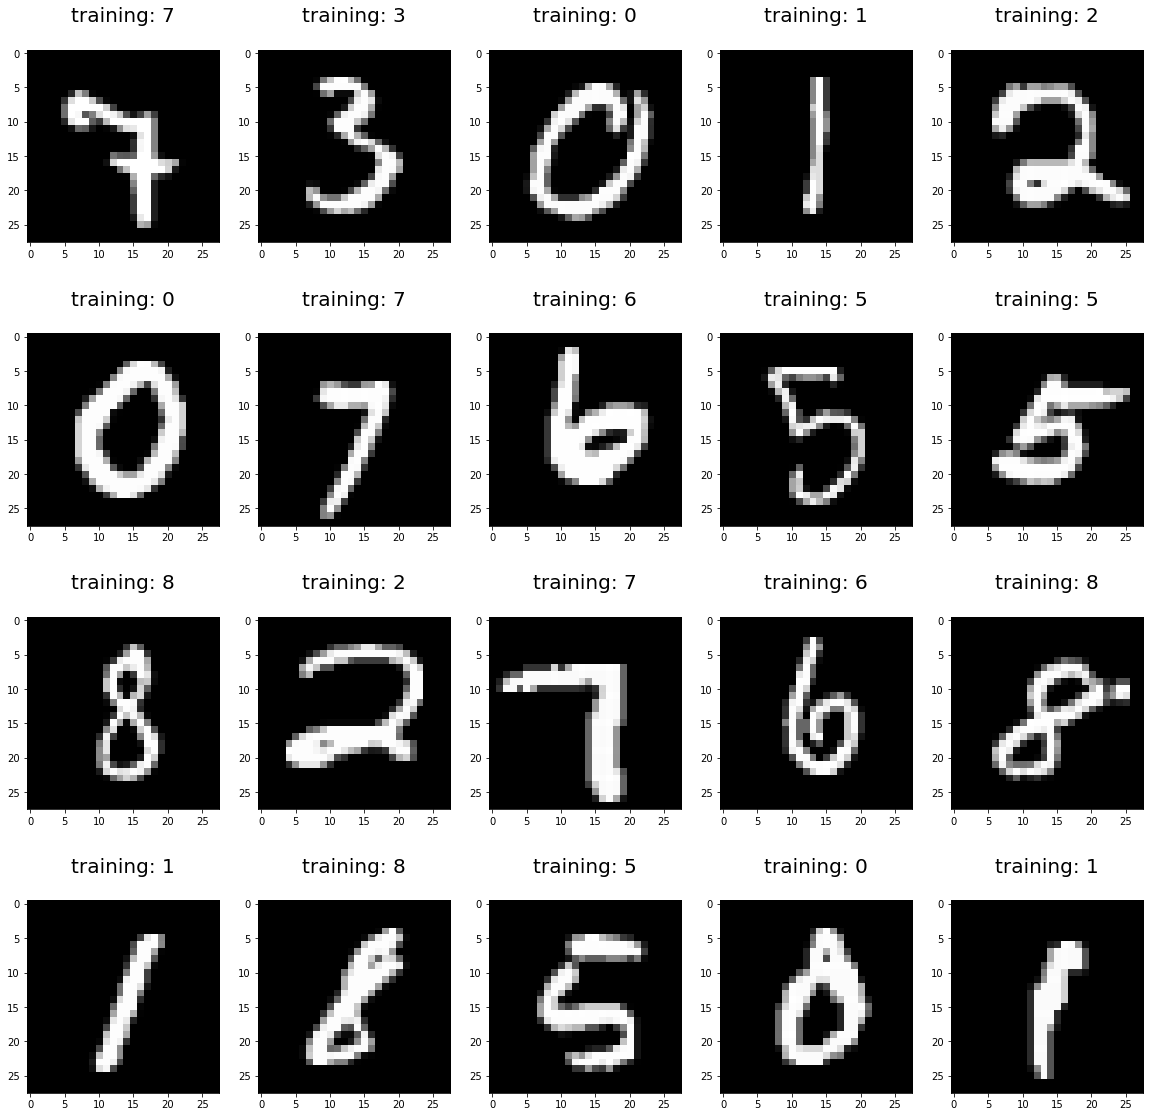

In [754]:
import numpy as np
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
for index, (image, label) in enumerate(zip(train_img[0:20], train_lbl[0:20])):
    plt.subplot(4, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('training: %s\n' % label, fontsize=20)

#### Part 9: Logistic Regression Modeling

Use the sklearn library to perform logistic regression on the data, and obtain the predicted values and accuracy score.

In [755]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(train_img, train_lbl)
predictions = lr.predict(test_img)
print('predictions:\n', predictions)

accuracy = lr.score(test_img, test_lbl)
print('accuracy: {:.0%}'.format(accuracy))

predictions:
 ['0' '4' '1' ... '1' '3' '0']
accuracy: 92%


#### Part 10: Misclassified Digits

Take a look at some of the digits that the model misclassified.

number of misclassified digits: 816


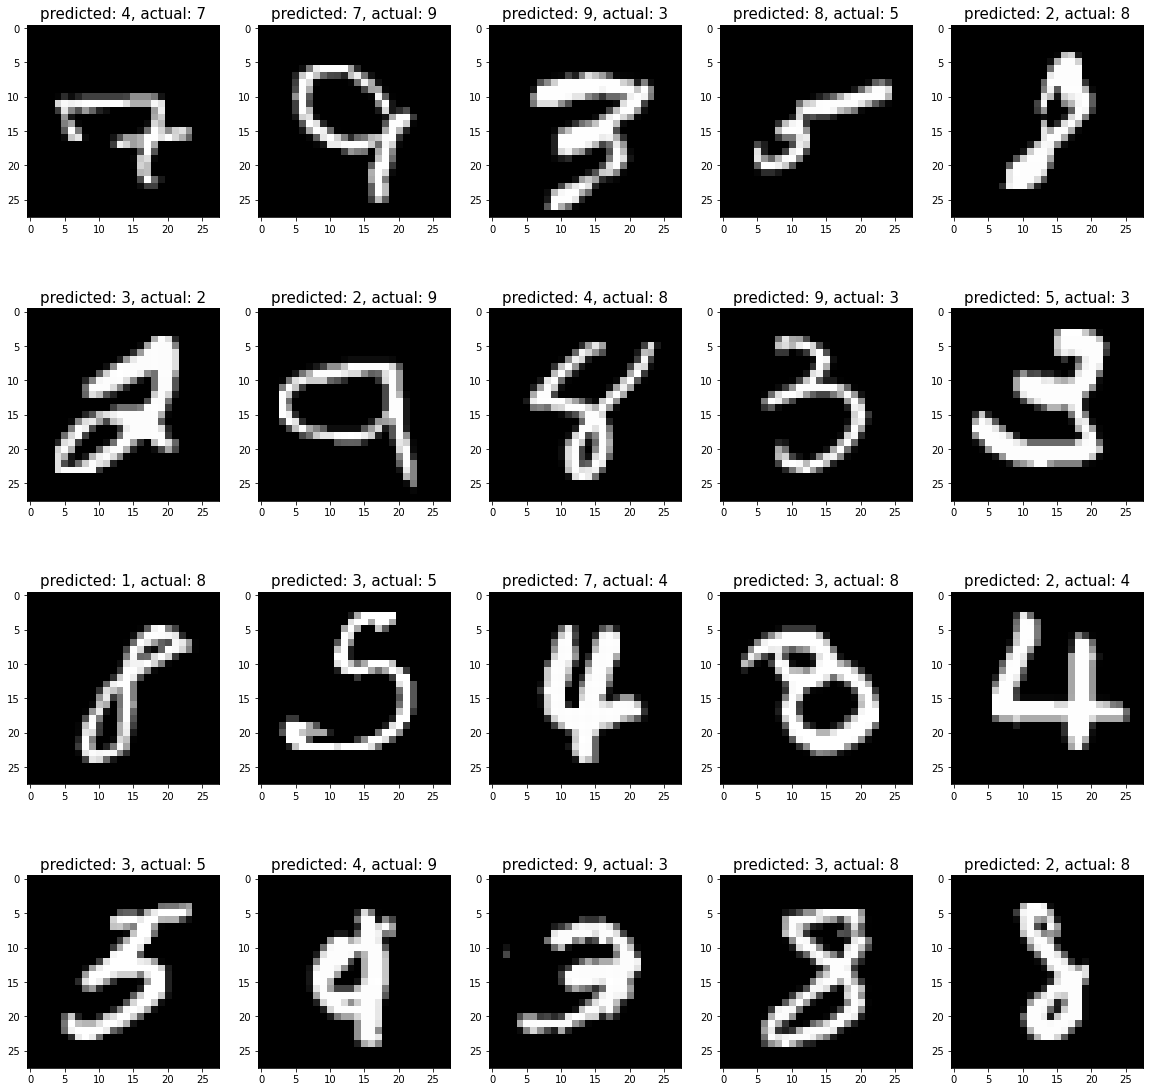

In [756]:
import numpy as np
import matplotlib.pyplot as plt

misclassified = []

# find misclassified digits
for index,(label, prediction) in enumerate(zip(test_lbl, predictions)):
    if int(label) != int(prediction):
        misclassified.append(index)
        index +=1 

print('number of misclassified digits:', len(misclassified))

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassified[0:20]):
 plt.subplot(4, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('predicted: {}, actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

-----

### Question 5

In this exercise, you will use the k-NN classifier to perform recognition. You will use the same training/test set partitioning as done in exercise 4. This will allow for comparison. Use *k=3* in your work. The k-NN classification will be run in two ways as described below:

- In the first experiment, pixel values of the digit images will be used as features 
- In the second experiment, you will create features from the input image and these features will be used for recognition. Potential features are 
  - Sum of 1's in small windows of suitable choice
  - Count of 1's along rows and columns 
  - Any other features of your choice 
- Again, analyze your results with plots/tables etc.

#### Part 1: Load sklearn Digits

Check out the shape of the data and the target.

In [757]:
from sklearn.datasets import load_digits

digits = load_digits()
print('shape of image data', digits.data.shape)
print('shape of label data', digits.target.shape)

shape of image data (1797, 64)
shape of label data (1797,)


#### Part 2: Plot Initial Training Images

Show each digit 0-9.

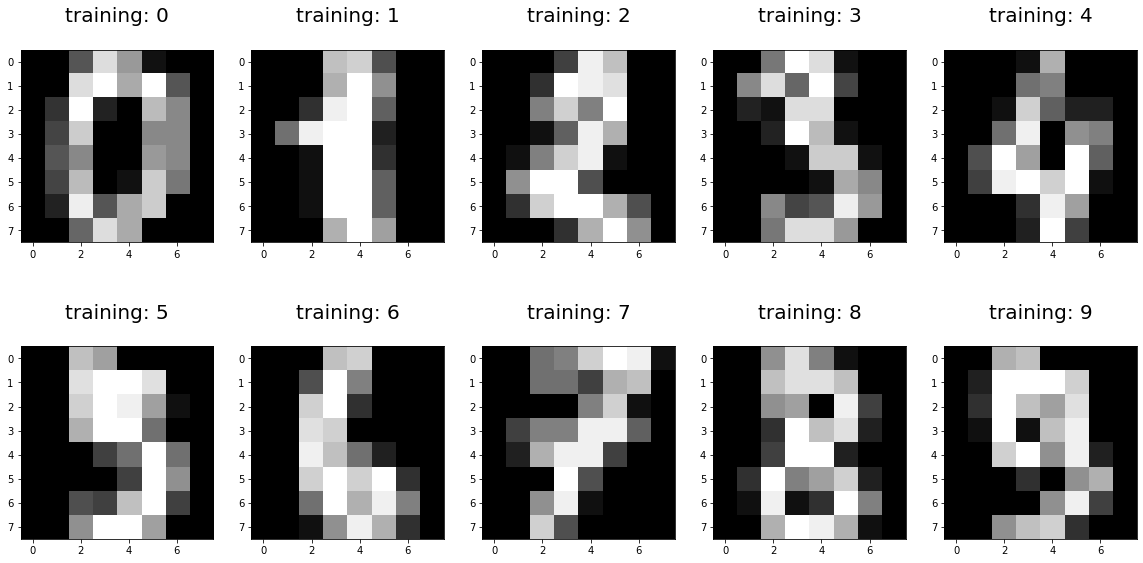

In [758]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('training: %i\n' % label, fontsize=20)

#### Part 3: Split Data for Training & Testing

25% of the data will be allocated to the test set.

In [759]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0
)

#### Part 4: k-NN Modeling

Use the sklearn Kmeans clustering model for training. Obtain the predictions.

In [760]:
from sklearn.cluster import KMeans 

knn = KMeans(n_clusters=3).fit(x_train, y_train)
predictions = knn.predict(x_test)
print('predictions:\n', predictions)


predictions:
 [0 0 0 2 2 0 0 1 1 0 0 0 2 2 2 2 0 2 0 1 1 0 1 2 0 1 2 1 0 1 2 0 2 0 1 2 1
 0 2 1 0 2 0 0 1 2 0 2 0 1 1 2 0 1 2 2 1 0 2 1 2 0 1 2 0 1 0 2 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 2 2 1 1 0 0 1 0 1 1 1 1 0 0 2 0 1 0 0 1 0 2 1 2 2 1 2 0 1
 2 0 1 0 0 0 1 0 1 0 1 1 2 0 0 2 2 0 2 1 1 1 1 1 1 0 0 1 2 0 0 2 1 2 1 0 0
 0 1 1 1 1 1 2 0 2 1 0 0 2 0 2 0 2 2 0 0 1 1 2 0 2 0 0 2 1 1 2 0 2 1 2 1 1
 1 1 1 2 2 0 1 0 0 2 0 0 1 2 2 0 2 0 2 2 2 1 1 2 1 1 1 1 1 2 0 1 2 1 1 1 2
 1 1 0 2 0 1 1 0 2 1 1 2 1 1 0 2 0 2 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 2 1 0 2 0 1 0 2 1 1 1 1 2 2 2 1 1 2 1 0 0 2 2 0 0 0 2 0 1 0 2 2 1 2 0 2 1
 2 2 0 1 2 0 0 0 2 1 2 2 2 0 2 0 0 0 2 0 1 0 1 2 1 0 0 2 0 1 0 0 2 0 0 0 1
 2 2 0 0 0 0 0 1 0 2 2 1 2 1 2 1 0 0 2 0 1 2 0 2 0 1 1 2 1 1 2 2 2 0 0 0 2
 1 2 1 0 0 1 2 1 0 1 0 1 1 2 2 0 2 2 0 0 2 0 2 2 2 0 1 0 0 1 0 2 1 1 2 0 0
 1 0 0 0 1 2 1 1 0 0 0 1 1 0 1 0 2 2 1 2 0 1 1 1 1 2 0 1 0 1 0 1 2 0 0 2 0
 1 0 0 1 0 1]


#### Part 5: Load MNIST Digits

Load the digit data from MNIST. Check out the shape of the data and the target.

In [394]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print('shape of data', mnist.data.shape)
print('shape of label', mnist.target.shape)

shape of data (70000, 784)
shape of label (70000,)


#### Part 6: k-NN Using Original Features

##### 6.1 Split Data for Training & Testing

1/7th of the data will be allocated to the test set.

In [761]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0
)

# convert to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)
train_lbl = np.array(train_lbl)
test_lbl = np.array(test_lbl)

##### 6.2 Display Training Digits

Show some of the digits used in the training set.

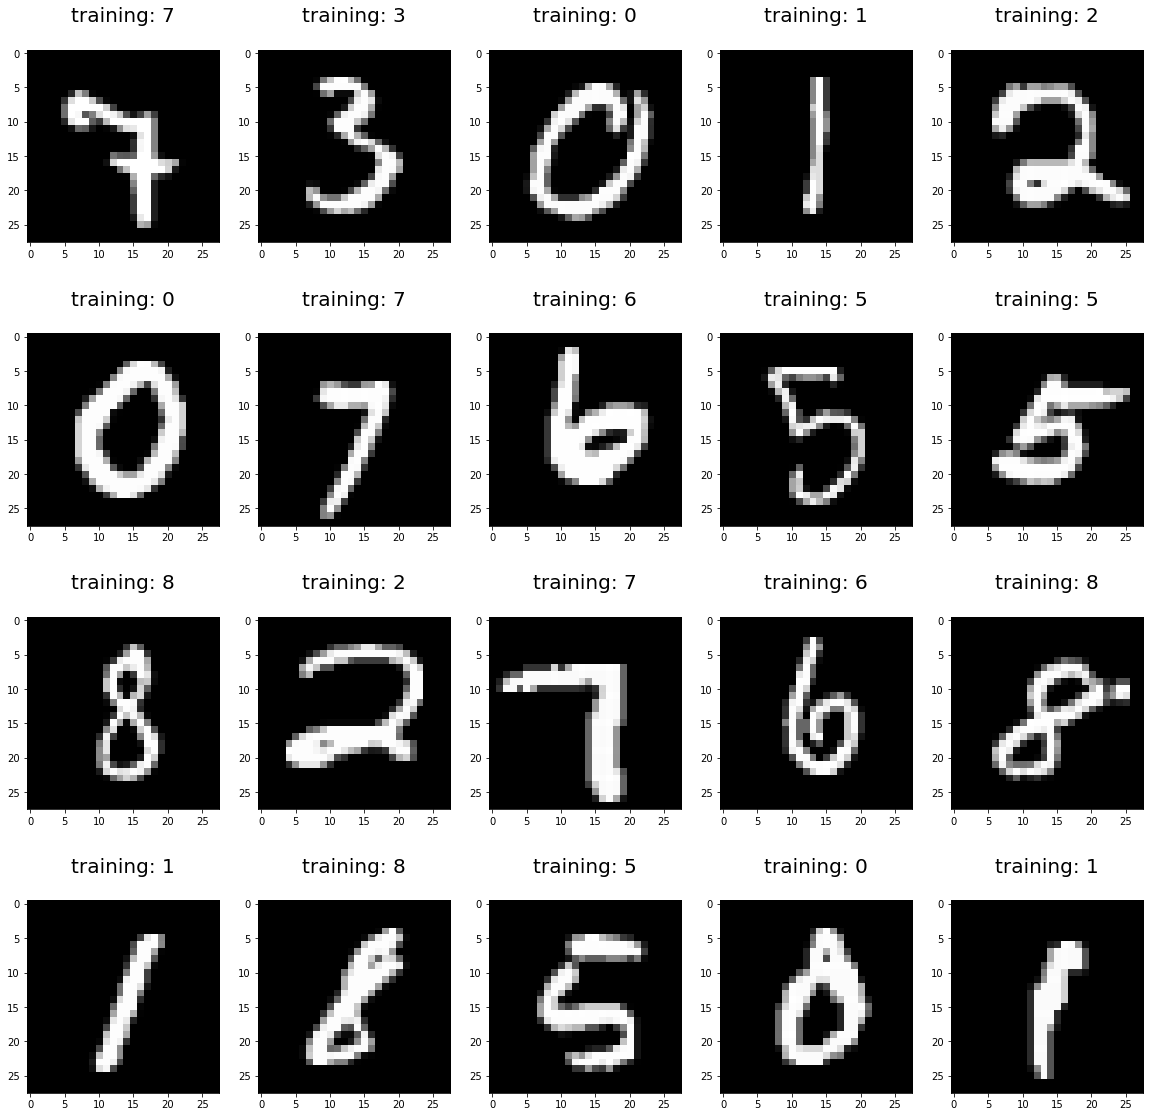

In [762]:
import numpy as np
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
for index, (image, label) in enumerate(zip(train_img[0:20], train_lbl[0:20])):
    plt.subplot(4, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('training: %s\n' % label, fontsize=20)

##### 6.3 k-NN Modeling

Use the sklearn k-NN clustering model for training. Obtain the predictions.

In [763]:
from sklearn.cluster import KMeans 

knn = KMeans(n_clusters=3).fit(train_img, train_lbl)
predictions = knn.predict(test_img)
print('predictions:\n', predictions)

predictions:
 [2 1 0 ... 0 0 2]


##### 6.4: Misclassified Digits

Take a look at some of the digits the model misclassified.

number of misclassified images 9453


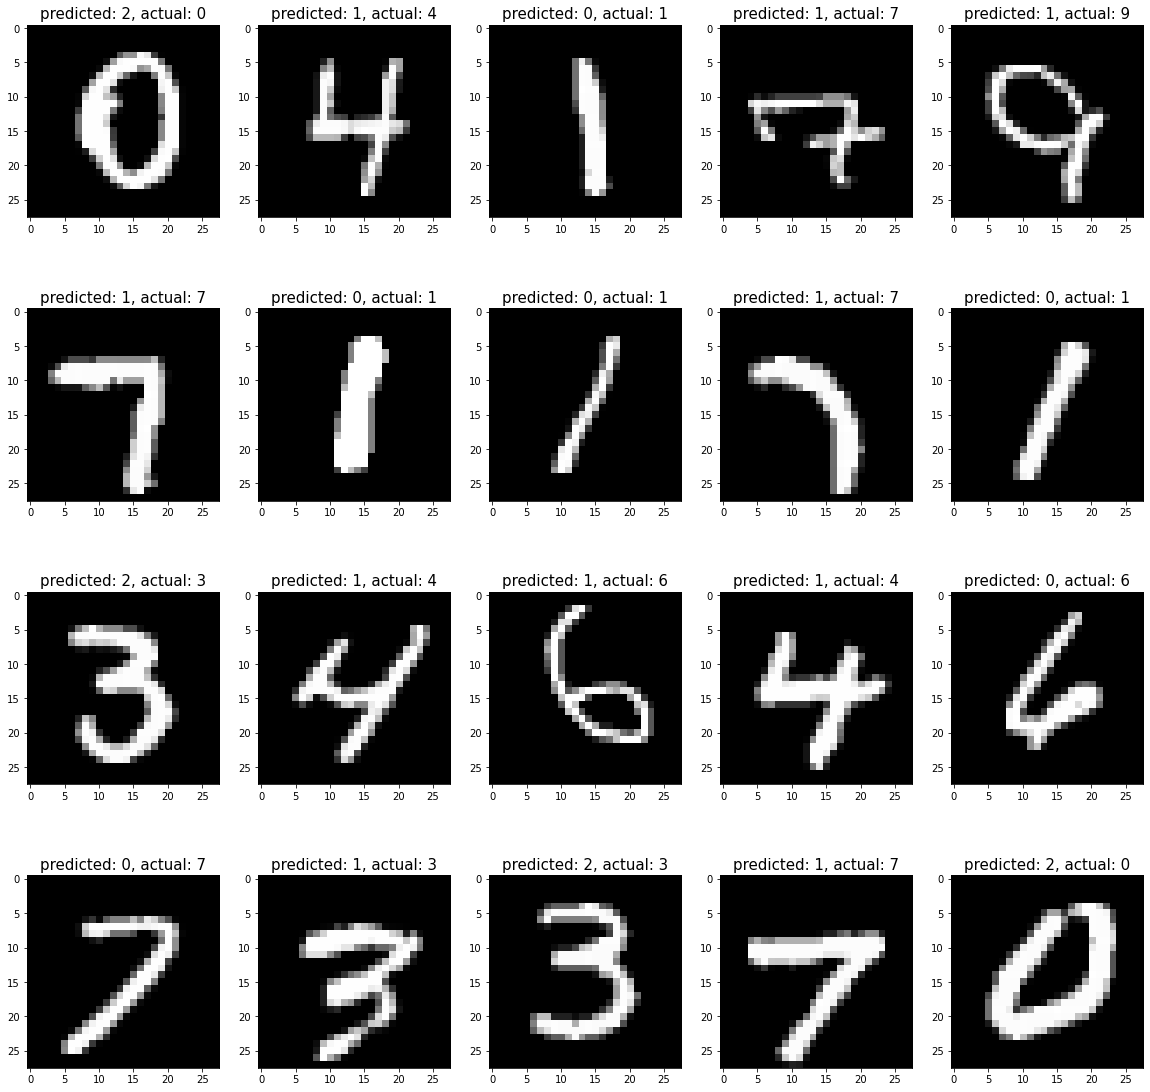

In [764]:
import numpy as np
import matplotlib.pyplot as plt

misclassified = []

# find misclassified digits
for index,(label, prediction) in enumerate(zip(test_lbl, predictions)):
    if int(label) != int(prediction):
        misclassified.append(index)
        index +=1 

print('number of misclassified images', len(misclassified))

plt.figure(figsize=(20,20))
for plotIndex, badIndex in enumerate(misclassified[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('predicted: {}, actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

#### Part 7: k-NN Using Custom Features 

##### 7.1 Feature selection

The second half of this problem is to use k-NN using custom features that are derived from the original dataset. The following features are used (on a per-image basis):

- The number of 1s 
- The number of 0s 
- The number of 1s in each row multiplied by the number of 1s in each column 
- The number of 0s in each row multiplied by the number of 0s in each column
- The number of 1s in each row multiplied by the number of 0s in each column
- The number of 0s in each row multiplied by the number of 1s in each column

In [765]:
data = np.array(mnist.data)
data = data.reshape(70000, 28, 28)

f1, f2, x, y = [], [], [], []
for i, img in enumerate(data):
    row1 = (img == 1).sum(axis=1) # number of 1s per each row
    col1 = (img == 1).sum(axis=0) # number of 1s per each col
    row0 = (img == 0).sum(axis=1) # number of 0s per each row
    col0 = (img == 0).sum(axis=0) # number of 0s per each col

    f1 = (img == 1).sum() # number of 1s per image
    f2 = (img == 0).sum() # number of 0s per image
    f3 = np.matmul(row1, col1)
    f4 = np.matmul(row0, col0)
    f5 = np.matmul(row1, col0)
    f6 = np.matmul(row0, col1)

    x.append([f1, f2, f3, f4, f5, f6])
    y.append(mnist.target[i])

x = np.array(x)
y = np.array(y)

##### 7.2: Split Data for Training & Testing

1/7th of the data will be allocated to the test set.

In [766]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
   x, y, test_size=1/7.0, random_state=0
)

# convert to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)
train_lbl = np.array(train_lbl)
test_lbl = np.array(test_lbl)

##### 7.3 k-NN Modeling

Use the sklearn k-NN clustering model to train the data. Obtain the predictions.

In [767]:
from sklearn.cluster import KMeans 

knn = KMeans(n_clusters=3).fit(train_img, train_lbl)
predictions = knn.predict(test_img)
print('predictions:\n', predictions)

predictions:
 [0 2 1 ... 1 2 0]


##### 7.4 Misclassified Digits

Take a look at some of the digits that the model incorrectly classified.

In [768]:
import numpy as np

misclassified = []

# find misclassified digits
for index,(label, prediction) in enumerate(zip(test_lbl, predictions)):
    if int(label) != int(prediction):
        misclassified.append([int(label), int(prediction)])
        index +=1 

print('number of misclassified digits:', len(misclassified))
print('some of the misclassifications were:\n', misclassified[0:9])


number of misclassified digits: 7786
some of the misclassifications were:
 [[4, 2], [7, 1], [9, 2], [7, 2], [7, 2], [3, 0], [4, 2], [2, 0], [6, 1]]


#### Part 8: Discussion

As you can see from problem 4, the logistic model performed much better, only misclassifying 816 images out of 70,000 (about a 98% success rate). The k-NN model performed worse, with a variation of about 8k-10k misclassifications between the two different feature sets (this is about a 85%-89% success rate). In either case, both models performed well. 